# TASK  7 : THE SPARKS FOUNDATION APRIL '21
---
### **Data Science and Business Analytics**

**TASK 7 - Stock Market Prediction using Numerical and Textual Analysis**

**Author : JONES ARPUTHARAJ S**

---

**Problem:**  

*   Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices.
*   Sentimental analysis of news headlines.
*   Stock to analyze and predict SENSEX(S&P BSE SENSEX)


# Import the necessary libraries

In [ ]:
#importing the necessary libraries

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense , LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor 

[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\HP
[nltk_data]     User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Load the necessary dataset

In [ ]:
# Load the first dataset

df1 = pd.read_csv("DATASET1.csv")
print('First Dataset has been loaded')

First Dataset has been loaded


In [ ]:
# Load the second dataset
cf = pd.read_csv("DATASET2.csv")
print('Second Dataset has been loaded')


Second Dataset has been loaded


# Information about the first dataset

In [ ]:
df1.head()  ##Prints the top five rows of the first dataset

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [ ]:
df1.tail()  ## Prints the bottom five rows of the second dataset

,publish_date,headline_category,headline_text
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,removed,Govt extends deadline for use of FASTag till F...
3424066,20201231,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


In [ ]:
df1.describe()   ##summarize the statistics of the dataframe

,publish_date
count,3.424067e+06
mean,2.012659e+07
std,4.981132e+04
min,2.001010e+07
25%,2.009113e+07
50%,2.013092e+07
75%,2.017013e+07
max,2.020123e+07


In [ ]:
df1.info()     ## Summarize the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


# Information about the second dataset

In [ ]:
cf.head()  ## Prints the top 5 rows of the dataset 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


In [ ]:
cf.tail()  ##Prints the bottom 5 rows of the dataset

,Date,Open,High,Low,Close,Adj Close,Volume
247,2020-12-11,46060.320313,46309.628906,45706.218750,46099.011719,46099.011719,26300.0
248,2020-12-14,46284.699219,46373.339844,45951.531250,46253.460938,46253.460938,18400.0
249,2020-12-15,46287.390625,46350.300781,45841.671875,46263.171875,46263.171875,16400.0
250,2020-12-16,46573.308594,46704.968750,46402.199219,46666.460938,46666.460938,13100.0
251,2020-12-17,46774.320313,46992.570313,46627.601563,46890.339844,46890.339844,0.0


In [ ]:
cf.shape  ##Prints the dimensions of the second dataset

(252, 7)

In [ ]:
cf.describe()   ## Summarize the statistics of the dataframe

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,37804.237375,38071.182859,37422.826992,37745.454117,37745.454117,19134.000000
std,4507.985769,4380.974060,4647.212947,4535.304336,4535.304336,16540.261333
min,26499.810547,27462.869141,25638.900391,25981.240234,25981.240234,0.000000
25%,34369.659179,34779.932618,33975.389648,34257.097656,34257.097656,13125.000000
50%,38489.480469,38750.359375,38234.869140,38425.974610,38425.974610,17000.000000
75%,41179.222656,41376.482422,41023.923828,41135.233399,41135.233399,21075.000000
max,46774.320313,46992.570313,46627.601563,46890.339844,46890.339844,188300.000000


In [ ]:
cf.info()    ## Summarize the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


# Exploration of the 1st dataset

In [ ]:
df1.isnull().sum()     ##Check for duplicated values of the first dataset

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [ ]:
df1.drop('headline_category', axis = 1, inplace=True)
print('Showing part of the whole dataset:')
df1.head(-5)


Showing part of the whole dataset:


,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic
...,...,...
3424057,20201231,50 NRIs reach Singhu; offer help to farmers
3424058,20201231,Navjot Singh Sidhu tweets apology; says 'wore ...
3424059,20201231,Azim Premji organisation's name misused to che...
3424060,20201231,Get govt nod to probe officials: MP to agencies


In [ ]:
##Checking for common information of the first dataset

df1["publish_date"] = pd.to_datetime(df1["publish_date"],format='%Y%m%d')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   publish_date   datetime64[ns]
 1   headline_text  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 52.2+ MB


In [ ]:
#removing unwanted characters from the news in the first dataset

df1.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
df1["headline_text"].head(5)

0    Status quo will not be disturbed at Ayodhya  s...
1                  Fissures in Hurriyat over Pak visit
2                America's unwanted heading for India 
3                   For bigwigs  it is destination Goa
4                 Extra buses to clear tourist traffic
Name: headline_text, dtype: object

# Data exploration of the second dataset

In [ ]:
# Checking  for common information of the second dataset
cf["Date"]= pd.to_datetime(cf["Date"])
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [ ]:
cf=cf[["Date","Open","High","Low","Close","Volume"]] #Analysing the information of the second dataset
cf.head(-5)

,Date,Open,High,Low,Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,6200.0
...,...,...,...,...,...,...
242,2020-12-04,44665.910156,45148.281250,44665.910156,45079.550781,27600.0
243,2020-12-07,45099.921875,45458.921875,45024.468750,45426.968750,18700.0
244,2020-12-08,45568.800781,45742.230469,45335.171875,45608.511719,18200.0
245,2020-12-09,45891.039063,46164.101563,45792.011719,46103.500000,20700.0


# Analysis and visualisation of numerical data

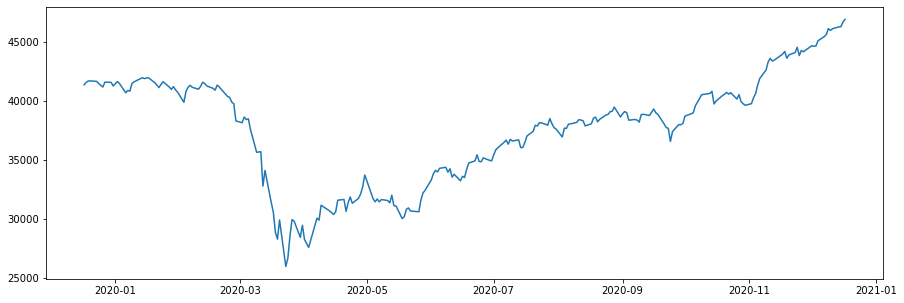

In [ ]:
# Extract the dataframe and visualise the stock price with respect to time
cf['Date'] = pd.to_datetime(cf.Date,format='%Y-%m-%d')
cf.index = cf['Date']
cf.dropna(inplace=True)
#plot
plt.figure(figsize=(15,5))
plt.plot(cf['Close'], label='Close Price history')

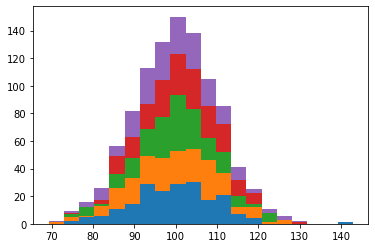

In [ ]:
#Using a stack graph
import numpy as np
import matplotlib.pyplot as plt
a,b = 100,10
x= a + b *np.random.randn(200,5)
n , bins , patches = plt.hist(x, 20,stacked=True)
plt.show()

# Normalization of the numerical data and dividing it into training and valid sets

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(df2, look_back=1):
    dataX, dataY = [], []
    for i in range(len(df2)-look_back-1):
        a = df2[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(df2[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
df2 = pd.read_csv('^BSESN.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

# Making predictions of the numerical data

In [ ]:
train = df1[:700]
valid = df1[700:]

In [ ]:
train.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India
3,2001-01-02,For bigwigs it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


# Analysis of Textual Data

In [ ]:
#Text Analysis

columns = ['Date','Category','News']
news = pd.read_csv('india-news-headlines.csv', names = columns)
news

C:\Users\HP User\miniconda3\envs\ai\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa
...,...,...,...
3424063,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,20201231,removed,Govt extends deadline for use of FASTag till F...


In [ ]:
news.drop(0, inplace=True)   ##Data preprocessing
news.drop('Category', axis = 1, inplace=True)
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424067 entries, 1 to 3424067
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    object
 1   News    object
dtypes: object(2)
memory usage: 78.4+ MB


In [ ]:
# Restructuring the date format
news['Date'] = pd.to_datetime(news['Date'],format= '%Y %m %d')
news

,Date,News
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic
...,...,...
3424063,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...
3424066,1970-01-01 00:00:00.020201231,Govt extends deadline for use of FASTag till F...


In [ ]:
news.head()

,Date,News
1,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2,2001-01-02,Fissures in Hurriyat over Pak visit
3,2001-01-02,America's unwanted heading for India?
4,2001-01-02,For bigwigs; it is destination Goa
5,2001-01-02,Extra buses to clear tourist traffic


In [ ]:
print(news.columns)

Index(['Date', 'News'], dtype='object')


In [ ]:
# Checking for null values
news.isnull().sum()

Date    0
News    0
dtype: int64

# Visualisation of textual data

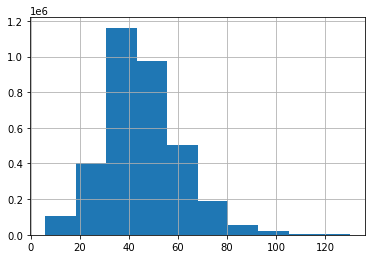

<Figure size 720x288 with 0 Axes>

In [ ]:
news['News'].str.len().hist()
plt.figure(figsize=(10,4))
plt.show()

# Addition of  subjectivity and polarity scores 

In [ ]:
##Import the necessary libraries for addition of subjectivity and polarity

In [ ]:
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer   ##Libraries necessary for sentiment analysis

In [ ]:
from textblob import TextBlob

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [ ]:
news['Subjectivity'] = news['News'].apply(getSubjectivity) ##Adding subjectivity score

In [ ]:
news['Polarity'] = news['News'].apply(getPolarity) ##Adding polarity scores

In [ ]:
news

,Date,News,Subjectivity,Polarity
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.000000
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit,0.000000,0.000000
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?,0.000000,0.000000
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa,0.000000,0.000000
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic,0.241667,0.050000
...,...,...,...,...
3424063,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000
3424064,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000
3424065,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000
3424066,1970-01-01 00:00:00.020201231,Govt extends deadline for use of FASTag till F...,0.000000,0.000000


# Visualisation of polarity scores 

<AxesSubplot:>

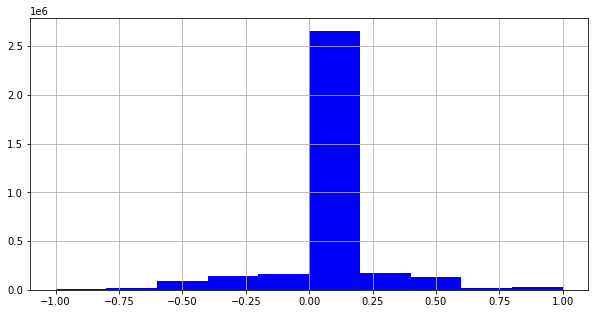

In [ ]:
plt.figure(figsize = (10,5))
news['Polarity'].hist(color = 'blue')

# Visualization of Subjectivity Scores

<AxesSubplot:>

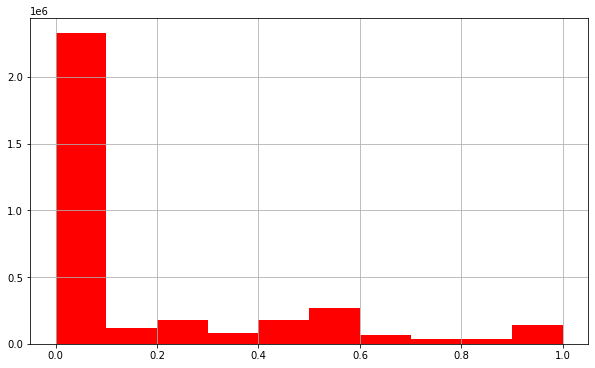

In [ ]:
plt.figure(figsize = (10,6))
news['Subjectivity'].hist(color = 'red')

# Performing Sentiment Analysis over the news Headlines

In [ ]:
sia = SentimentIntensityAnalyzer()  ##Adding sentiment score to news

In [ ]:
news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['News']] ##Adding sentiment score to news

In [ ]:
news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news['News']] ##Adding sentiment score to news

In [ ]:
news['Positive'] = [sia.polarity_scores(v)['pos'] for v in news['News']] ##Adding sentiment score to news

In [ ]:
news   ##Information of the dataframe showing subjectivity, polarity and sentiment score of news

,Date,News,Subjectivity,Polarity,Negative,Neutral,Positive
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.000000,0.000,0.805,0.195
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.000,1.000,0.000
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?,0.000000,0.000000,0.322,0.678,0.000
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa,0.000000,0.000000,0.000,1.000,0.000
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic,0.241667,0.050000,0.000,0.658,0.342
...,...,...,...,...,...,...,...
3424063,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424064,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424065,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424066,1970-01-01 00:00:00.020201231,Govt extends deadline for use of FASTag till F...,0.000000,0.000000,0.000,0.857,0.143


# Merging numerical and textual data to create a hybrid model

In [ ]:
merge = news  ## Merging numerical and textual data to create a hybrid model
merge

,Date,News,Subjectivity,Polarity,Negative,Neutral,Positive
1,2001-01-02 00:00:00.000000000,Status quo will not be disturbed at Ayodhya; s...,0.000000,0.000000,0.000,0.805,0.195
2,2001-01-02 00:00:00.000000000,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.000,1.000,0.000
3,2001-01-02 00:00:00.000000000,America's unwanted heading for India?,0.000000,0.000000,0.322,0.678,0.000
4,2001-01-02 00:00:00.000000000,For bigwigs; it is destination Goa,0.000000,0.000000,0.000,1.000,0.000
5,2001-01-02 00:00:00.000000000,Extra buses to clear tourist traffic,0.241667,0.050000,0.000,0.658,0.342
...,...,...,...,...,...,...,...
3424063,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424064,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424065,1970-01-01 00:00:00.020201231,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424066,1970-01-01 00:00:00.020201231,Govt extends deadline for use of FASTag till F...,0.000000,0.000000,0.000,0.857,0.143


# Create a dataset for model training

In [ ]:
clf = merge[['Subjectivity', 'Polarity',  'Negative', 'Neutral' ,'Positive']]  ##Dataset for the purpose of model training
clf

,Subjectivity,Polarity,Negative,Neutral,Positive
1,0.000000,0.000000,0.000,0.805,0.195
2,0.000000,0.000000,0.000,1.000,0.000
3,0.000000,0.000000,0.322,0.678,0.000
4,0.000000,0.000000,0.000,1.000,0.000
5,0.241667,0.050000,0.000,0.658,0.342
...,...,...,...,...,...
3424063,0.500000,0.500000,0.000,0.859,0.141
3424064,0.500000,0.500000,0.000,0.859,0.141
3424065,0.500000,0.500000,0.000,0.859,0.141
3424066,0.000000,0.000000,0.000,0.857,0.143


# Normalize the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler   ##Import the necessary libraries


In [ ]:
scaler = MinMaxScaler()

In [ ]:
df = pd.DataFrame(scaler.fit_transform(clf))

In [ ]:
df.columns = clf.columns
df.index = clf.index




In [ ]:
df.head()    ##Printing the top 5 rows for observation purpose

,Subjectivity,Polarity,Negative,Neutral,Positive
1,0.000000,0.500,0.000,0.805,0.195
2,0.000000,0.500,0.000,1.000,0.000
3,0.000000,0.500,0.322,0.678,0.000
4,0.000000,0.500,0.000,1.000,0.000
5,0.241667,0.525,0.000,0.658,0.342


In [ ]:
df.tail()  ##Printing the botttom 5 rows for observation purpose

,Subjectivity,Polarity,Negative,Neutral,Positive
3424063,0.500000,0.750000,0.0,0.859,0.141
3424064,0.500000,0.750000,0.0,0.859,0.141
3424065,0.500000,0.750000,0.0,0.859,0.141
3424066,0.000000,0.500000,0.0,0.857,0.143
3424067,0.477273,0.659091,0.0,0.604,0.396


In [ ]:
X=df[:1113]
X


,Subjectivity,Polarity,Negative,Neutral,Positive
1,0.000000,0.500000,0.000,0.805,0.195
2,0.000000,0.500000,0.000,1.000,0.000
3,0.000000,0.500000,0.322,0.678,0.000
4,0.000000,0.500000,0.000,1.000,0.000
5,0.241667,0.525000,0.000,0.658,0.342
...,...,...,...,...,...
1109,0.000000,0.500000,0.000,1.000,0.000
1110,0.571429,0.678571,0.000,0.270,0.730
1111,0.400000,0.600000,0.000,0.345,0.655
1112,0.400000,0.500000,0.000,1.000,0.000


In [ ]:
Y = df[1113 :]
Y

,Subjectivity,Polarity,Negative,Neutral,Positive
1,0.000000,0.500000,0.000,0.805,0.195
2,0.000000,0.500000,0.000,1.000,0.000
3,0.000000,0.500000,0.322,0.678,0.000
4,0.000000,0.500000,0.000,1.000,0.000
5,0.241667,0.525000,0.000,0.658,0.342
...,...,...,...,...,...
1109,0.000000,0.500000,0.000,1.000,0.000
1110,0.571429,0.678571,0.000,0.270,0.730
1111,0.400000,0.600000,0.000,0.345,0.655
1112,0.400000,0.500000,0.000,1.000,0.000


# Split the dataset into training and test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [ ]:
x_train[:10]

,Subjectivity,Polarity,Negative,Neutral,Positive
295,0.00,0.5000,0.439,0.561,0.000
524,0.00,0.5000,0.239,0.761,0.000
882,0.00,0.5000,0.000,1.000,0.000
810,0.00,0.5000,0.633,0.367,0.000
957,0.40,0.7000,0.000,1.000,0.000
423,0.00,0.5000,0.000,1.000,0.000
562,0.00,0.5000,0.000,1.000,0.000
787,0.35,0.4875,0.000,1.000,0.000
920,1.00,0.5000,0.000,0.316,0.684
1067,0.00,0.5000,0.000,1.000,0.000


# Implementation Of RandomForestRegressor  on the model

In [ ]:
rf = RandomForestRegressor()   ##Implementing the random forest regressor model


In [ ]:
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [ ]:
print(prediction[:10])
print(y_test[:10])

[[0.         0.5        0.         1.         0.        ]
 [0.         0.5        0.         1.         0.        ]
 [0.         0.5        0.00221    0.4769     0.52089   ]
 [0.         0.5        0.         1.         0.        ]
 [0.         0.5        0.21363    0.78637    0.        ]
 [0.         0.5        0.32394    0.67606    0.        ]
 [0.         0.5        0.29497    0.70503    0.        ]
 [0.         0.5        0.         0.64871    0.35129   ]
 [0.35583333 0.67558333 0.         0.73516    0.26484   ]
 [0.         0.5        0.         1.         0.        ]]
      Subjectivity  Polarity  Negative  Neutral  Positive
878           0.00     0.500     0.000    1.000     0.000
426           0.00     0.500     0.000    1.000     0.000
187           0.00     0.500     0.000    0.477     0.523
1090          0.00     0.500     0.000    1.000     0.000
749           0.00     0.500     0.213    0.787     0.000
620           0.00     0.500     0.324    0.676     0.000
546          

In [ ]:
print('Mean Squared error: ',mean_squared_error(prediction,y_test)) ##Calculating the mean squared error of RandomForestRegressor Model

Mean Squared error:  0.0005611627375467432


## Observation : 

**So, we can observe that the mean squared error generated from the RandomForestRegressor Model is 0.00056 (app.)**

# Implemenation of DecisionTreeRegressor on the Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor   ##Implementing the DecisionTreeRegressor Model

In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)


DecisionTreeRegressor()

In [ ]:
predictions = dtr.predict(x_test)

In [ ]:
print(predictions[:10])


[[0.    0.5   0.    1.    0.   ]
 [0.    0.5   0.    1.    0.   ]
 [0.    0.5   0.    0.477 0.523]
 [0.    0.5   0.    1.    0.   ]
 [0.    0.5   0.213 0.787 0.   ]
 [0.    0.5   0.324 0.676 0.   ]
 [0.    0.5   0.296 0.704 0.   ]
 [0.    0.5   0.    0.649 0.351]
 [0.35  0.675 0.    0.735 0.265]
 [0.    0.5   0.    1.    0.   ]]


In [ ]:
print(y_test[:10])

      Subjectivity  Polarity  Negative  Neutral  Positive
878           0.00     0.500     0.000    1.000     0.000
426           0.00     0.500     0.000    1.000     0.000
187           0.00     0.500     0.000    0.477     0.523
1090          0.00     0.500     0.000    1.000     0.000
749           0.00     0.500     0.213    0.787     0.000
620           0.00     0.500     0.324    0.676     0.000
546           0.00     0.500     0.296    0.704     0.000
383           0.00     0.500     0.000    0.649     0.351
413           0.35     0.675     0.000    0.735     0.265
205           0.00     0.500     0.000    1.000     0.000


In [ ]:
print('Mean Squared error: ',mean_squared_error(predictions,y_test))

Mean Squared error:  0.001322569469912945


## Observation : 

**So, we can observe that the mean squared error generated from the DecisionTreeRegressor Model is 0.0013 (app.)**

# **Conclusions :**

* We were able to create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices  and sentiment analysis of news headlines.

* We have used two models, Random Forest Regressor and Decision Tree Regressor for carrying out hybrid analysis.

* Since the mean squared error of Random Forest Regressor is 0.0005 , therefore it serves as a suitable model for hybrid analysis.